# **Solução Numérica de Equações Diferênciais**
## Oscilador Harmônico Amortecido e Forçado

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib notebook

## **Equação Diferencial**


### $x''+\alpha x'+\omega_0^2 x=0$

#### Condições iniciais: $x(0)=1$ e $x'(0)=0$.

## **Método de Euler**

### $ x(t_0+\Delta t)=x(t_0)+\Delta t x'(t_0) $
### $ x'(t_0+\Delta t)=x'(t_0)+\Delta t x''(t_0) $
### $ x''(t_0)=-\alpha x'(t_0)-\omega_0^2 x(t_0) $

## **Parâmetros da Equação**

In [2]:
x0=5
v0=5
alpha=0.3
omega0=1.0
t= np.linspace(0,25,1000)

In [3]:
def oscilador (tempo, x0=5, v0=0, alpha=0.1, omega0=1.0):
  x=np.asarray([0.0]*len(t))
  v=np.asarray([0.0]*len(t))
  x[0]=x0
  v[0]=v0
  deltaT=t[1]-t[0]
  k=1
  while k < len(t):    # calculo de x[k] e v[k]
    a=-alpha * v[k-1] - x[k-1]*omega0*omega0
    x[k]= x[k-1] + v[k-1]*deltaT + 0.5*a*deltaT**2    #Para corrigir a aproximação feita pela equação de Euler, adicina na equação o termo quadrático do M.U.V
    #print (v[k-1]+a*deltaT)
    v[k]= v[k-1] + a*deltaT
    k=k+1
  return x, v

### $ x''+\alpha x'+\omega_0^2 x=0 $
### $ \lambda^2+\alpha\lambda+\omega_0^2=0 \Rightarrow \Delta=\alpha^2-4\omega^2 $

##### Condição de Amortecimento Crítico: $ \alpha=2\omega_0 $

## **Comparando as Diferentes Soluções para o Amortecimento**

<IPython.core.display.Javascript object>


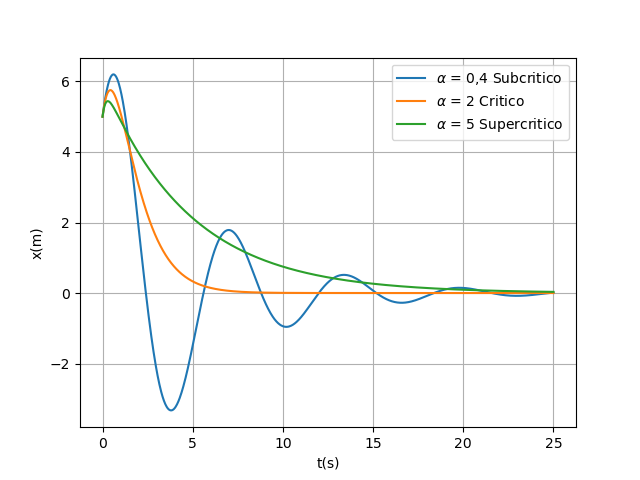

In [4]:
x_subcritico, v_subcritico, = oscilador (t, v0=4, alpha=0.4, omega0=1.0)
x_critico, v_critico, = oscilador (t, v0=4, alpha=2, omega0=1.0)
x_supercritico, v_supercritico, = oscilador (t, v0=4, alpha=5, omega0=1.0)

plt.plot(t,x_subcritico, label = r'$\alpha$ = 0,4 Subcritico')
plt.plot(t,x_critico, label = r'$\alpha$ = 2 Critico')
plt.plot(t,x_supercritico, label = r'$\alpha$ = 5 Supercritico')

plt.ylabel ('x(m)')
plt.xlabel ('t(s)')

plt.grid()
plt.legend()
#plt.show()

## Oscilador Harmônico Forçado

In [5]:
def forca(t):
    return np.cos(3*t)

### $ x''+\alpha x'+\omega_0^2x=f(t) \Rightarrow x''=f(t)=\alpha x'-\omega_0^2 x $

In [6]:
def oscilador_forcado (tempo, x0=5, v0=0, alpha=0.1,forca=forca, omega0=1.0):
    x=np.asarray([0.0]*len(t))
    v=np.asarray([0.0]*len(t))
    x[0]=x0
    v[0]=v0
    deltaT=t[1]-[0]
    k=1
    while k < len(t):
        a=forca(tempo[k])-alpha * v[k-1] - x[k-1]*omega0*omega0
        x[k]= x[k-1] + v[k-1]*deltaT
        #print (v[k-1] + a*deltaT)
        v[k]= v[k-1] + a*deltaT
        k=k+1
    return x, v

In [7]:
t= np.linspace(0,25,1000)

<IPython.core.display.Javascript object>


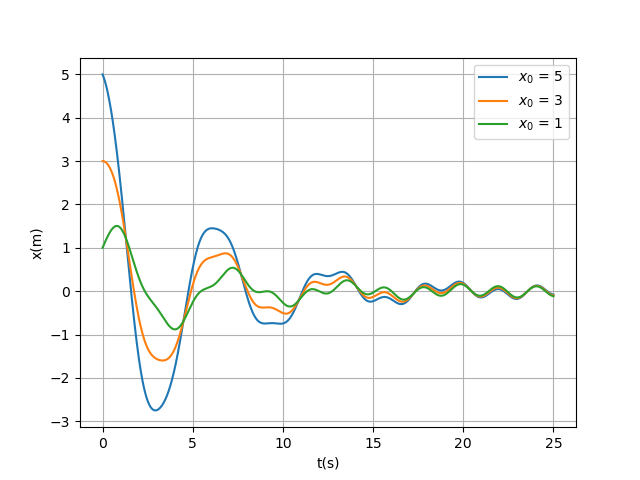

In [8]:
x1, v1,=oscilador_forcado(t, x0=5,v0=-1,alpha=0.4, forca=forca,omega0=1.0)
x2, v2,=oscilador_forcado(t, x0=3,alpha=0.4, forca=forca,omega0=1.0)
x3, v3,=oscilador_forcado(t, x0=1,v0=1,alpha=0.4, forca=forca,omega0=1.0)

plt.plot(t,x1, label=r'$x_0$ = 5')
plt.plot(t,x2, label=r'$x_0$ = 3')
plt.plot(t,x3, label=r'$x_0$ = 1')

plt.ylabel('x(m)')
plt.xlabel('t(s)')

plt.grid()
plt.legend()
#plt.show()

## Animação

<IPython.core.display.Javascript object>


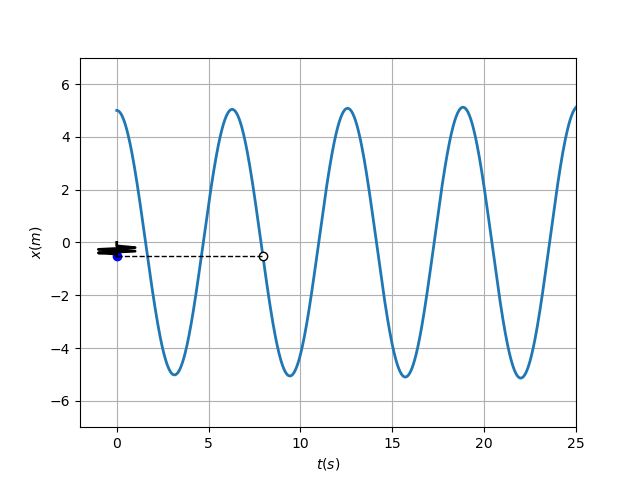

In [9]:
t= np.linspace(0,25,1000)

fig = plt.figure()
ax = plt.axes(xlim=(-2, 25), ylim=(-7,7))

line, = ax.plot([], [], lw=2)
particle, = ax.plot ([], [], 'bo', ms=6)
particle_open, = ax.plot([], [], 'wo', ms=6,markeredgecolor='black')
mola, = ax.plot([], [], lw=2, color='black')
dashed_line, = ax.plot([], [], 'k--', lw=1)

def init():
  particle.set_data([], [])
  particle_open.set_data([], [])
  line.set_data([], [])
  mola.set_data([], [])
  dashed_line.set_data([], [])
  return line,particle, particle_open, mola,dashed_line

def animate(i):
  global t
  x = t
  y, v = oscilador (t, v0=0,alpha=0.01, omega0=1.0)
  xk=x[i] 
  yk = y[i]
  line.set_data(x, y)
  l=1
  mola.set_data([0,0,l,-l,l,-l,0,0], [0,0.25*yk,0.375*yk,0.5*yk,0.625*yk,0.75*yk,0.825*yk,yk])
  particle.set_data(0, yk)
  particle_open.set_data(xk, yk)
  dashed_line.set_data([0,xk], [yk,yk])

  return line,particle, particle_open, mola,dashed_line

anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=1000, interval=2, blit=True)

plt.ylabel('$x(m)$')
plt.xlabel('$t(s)$')

plt.grid()
plt.show()